In [1]:
import pandas as pd
import numpy as np
import random
from gensim import corpora
import matplotlib.pyplot as plt
from libs.Cleaner import Cleaner
from libs.Metricas import Metricas
import json
%matplotlib inline

In [2]:
# Leemos los corpus de las dos revistas Brando y Ohlala
df = pd.read_pickle("../data/leyes_con_texto.p")
#print("Articulos en 'Brando' : {0:d}\n".format(len(list(dict_brando.keys()))))

### Convertimos las estructuras de  diccionarios a data.frame 

In [3]:
df.head()

,id_norma,tipo_norma,numero_norma,clase_norma,organismo_origen,fecha_sancion,numero_boletin,fecha_boletin,pagina_boletin,titulo_resumido,titulo_sumario,texto_resumido,observaciones,texto_original,texto_actualizado,modificada_por,modifica_a,texto
0,183290,Ley,S/N,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1853-11-09,NaN,NaN,NaN,ORGANIZACION DE LA HACIENDA Y CREDITO PUBLICO,ADMINISTRACION PUBLICA NACIONAL,ESTATUTO PARA LA ORGANIZACION DE LA HACIENDA Y...,LA PRESENTE LEY CORRESPONDE A LAS SANCIONADAS ...,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,1,NaN,Ley del estatuto El Congreso...
1,280913,Ley,5,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1854-11-21,NaN,NaN,NaN,FACULTADES DEL PODER EJECUTIVO,SEGURIDAD NACIONAL,AUTORIZA A TOMAR MEDIDAS PARA GARANTIZAR LA SE...,LA NUMERACION DE LA PRESENTE LEY CORRESPONDE A...,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,1,NaN,Ley autorizando al Poder Ejec...
2,214371,Ley,6,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1854-11-28,NaN,NaN,NaN,MINAS DE CARBON DE PIEDRA,HIDROCARBUROS,LAS MINAS DE CARBON DE PIEDRA QUEDAN COMPRENDI...,LA NUMERACION DE LA PRESENTE LEY CORRESPONDE A...,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,2,1.0,Ley N° 6 Ley declarando a las m...
3,280912,Ley,7,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1854-11-28,NaN,NaN,NaN,NaN,PODER LEGISLATIVO,OBJETO CUMPLIDO-SUPLENTES DE SENADORES Y DIPUT...,PUBLICADA EN REGISTRO NACIONAL DE 1856,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,0,NaN,Ley sobre nombramiento de sup...
4,280756,Ley,8,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1854-11-29,NaN,NaN,NaN,CONTRATO - AUTORIZACION,COLONIZACION,AUTORIZA APROBACION CONTRATO DE COLONIZACION C...,LA NUMERACION DE LA PRESENTE LEY CORRESPONDE A...,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,1,NaN,Ley N° 8 Ley autorizando Ejecut...


In [4]:
# concatenamos las dos revistas para mirar que tenemos por años ....
df_corpus = df[df['fecha_sancion']> '1983-12-09']
df_corpus = df_corpus.reset_index(drop=True)
df_corpus['year'] = pd.to_datetime(df_corpus['fecha_sancion']).dt.year
df_corpus.head(50)

,id_norma,tipo_norma,numero_norma,clase_norma,organismo_origen,fecha_sancion,numero_boletin,fecha_boletin,pagina_boletin,titulo_resumido,titulo_sumario,texto_resumido,observaciones,texto_original,texto_actualizado,modificada_por,modifica_a,texto,year
0,28165,Ley,23041,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1983-12-22,25335.0,1984-01-04,0.0,PORCENTAJE DE PAGO,SUELDO ANUAL COMPLEMENTARIO,ESTABLECESE QUE EL SUELDO ANUAL COMPLEMENTARIO...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,6,1.0,SUELDO ANUAL COMPLEMENTARIO...,1983
1,28166,Ley,23040,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1983-12-22,25331.0,1983-12-29,1.0,LEY Nº 22.924 - SU DEROGACION,PACIFICACION NACIONAL,DEROGASE POR INCONSTITUCIONAL LA LEY Nº 22.924...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,1,1.0,LEY DE PACIFICACION NACIONAL...,1983
2,28159,Ley,23047,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-02-08,25373.0,1984-02-27,1.0,SU MODIFICACION,IMPUESTOS INTERNOS,MODIFICASE EL TEXTO ORDENADO DE 1979 SOBRE IMP...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,0,2.0,IMPUESTOS LEY Nº 23.047 Mo...,1984
3,25463,Ley,23059,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-02-09,25404.0,1984-04-10,0.0,NORMATIVA APLICABLE,NACIONALIDAD Y CIUDADANIA,"DEROGASE LA LEY Nº 21.795, RESTITUYENDOSE LA V...",NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,3,7.0,CIUDADANIA Restitución de la v...,1984
4,28157,Ley,23049,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-02-09,25365.0,1984-02-15,0.0,SU MODIFICACION,CODIGO DE JUSTICIA MILITAR,MODIFICASE EL CODIGO DE JUSTICIA MILITAR. LA J...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,0,2.0,CODIGO DE JUSTICIA MILITAR ...,1984
5,28154,Ley,23052,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-02-22,25390.0,1984-03-21,0.0,ENTE DE CALIFICACION - SU DISOLUCION,CINEMATOGRAFIA,DEROGASE LA LEY Nº 18.019 Y DISUELVASE EL ENTE...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,11,1.0,LEY 23.052 Régimen de cal...,1984
6,28152,Ley,23054,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-03-01,25394.0,1984-03-27,0.0,SU APROBACION,PACTO SAN JOSE DE COSTA RICA,"APRUEBASE EL PACTO DE SAN JOSE DE COSTA RICA, ...",NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,16,NaN,<!-- /* Font Definitions */ @font-f...,1984
7,28151,Ley,23055,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-03-01,25386.0,1984-03-15,1.0,SU MODIFICACION,JUNTA NACIONAL DE CARNES,MODIFICASE LA LEY N° 21.740 EN RELACION CON EL...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,0,1.0,CARNES LEY N° 23.055 Modificac...,1984
8,28148,Ley,23058,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-03-15,25403.0,1984-04-09,1.0,RESTITUYEN SU AUTARQUIA,INSTITUTO NACIONAL DE TECNOLOGIA AGROPECUARIA,RESTITUYESE AL INSTITUTO NACIONAL DE TECNOLOGI...,NaN,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,0,2.0,INSTITUTO NACIONAL DE TECNOL...,1984
9,28150,Ley,23056,NaN,HONORABLE CONGRESO DE LA NACION ARGENTINA,1984-03-15,25393.0,1984-03-26,1.0,SU REALIZACION,PROGRAMA ALIMENTARIO NACIONAL,FACULTASE AL PODER EJECUTIVO PARA LA REALIZACI...,ABROGADA POR LEY Nº 23.767,http://servicios.infoleg.gob.ar/infolegInterne...,NaN,3,NaN,PROGRAMA ALIMENTARIO NACIONA...,1984


Text(0,0.5,'Leyes')

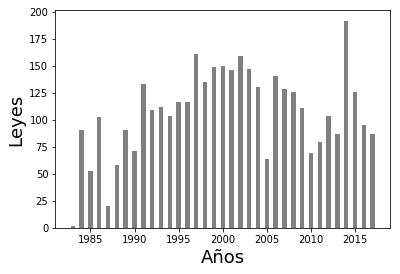

In [5]:
#Va el grafico de barras de articulos de las revistas por año
c_leyes = df_corpus.groupby('year').year.count().values
len(c_leyes)

leyes_grafico = c_leyes[0:35:1]

ax = plt.subplot(111)

year = np.arange(1983, 2018) # genero los labels para x
ax.bar(year, leyes_grafico, width=0.5, color='grey', align='center') # ploteo brando
ax.set_xlabel("Años", fontsize=18)
ax.set_ylabel('Leyes', fontsize=18)
# plt.show();

In [6]:
df = df_corpus[['year','texto']].reset_index(drop=True)
df.head(2)

,year,texto
0,1983,SUELDO ANUAL COMPLEMENTARIO...
1,1983,LEY DE PACIFICACION NACIONAL...


### Armo un diccionario con todo el corpus, y un Term Document Matrix por año-revista

In [7]:
cleaner = Cleaner()

In [11]:
text_clean = cleaner.data_clean(data=df['texto'],stemming=False)


preprocess: 100%|██████████| 3786/3786 [00:03<00:00, 1030.78it/s]

In [12]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(random.sample(text_clean,5))
print(len(text_clean))
df.shape

[   'identificacion registro clasificacion potencial humano ley n NUM NUM '
    'amnistiase cumplimentado decreto ley n NUM NUM aquellas hubieren '
    'incurrido infracciones previstas ley n NUM NUM sancionada julio NUM NUM '
    'promulgada agosto NUM NUM senado camara diputados nacion argentina '
    'reunidos congreso etc sancionan fuerza ley articulo NUM amnistiase fecha '
    'promulgacion presente ley dado cumplimiento preceptuado articulos NUM NUM '
    'decreto ley NUM NUM NUM ratificado ley NUM NUM modificatorios '
    'complementarios articulo NUM amnistiase fecha promulgacion presente ley '
    'hubieren incurrido infracciones previstas articulos NUM NUM NUM NUM ley '
    'identificacion registro clasificacion porcentual humano nacional n NUM '
    'NUM sustituidos articulo NUM similar n NUM NUM articulo NUM comprendidas '
    'articulos NUM NUM ley deberan dar cumplimiento obligacion termino NUM ano '
    'contar treinta NUM dias publicada presente articulo NUM comuniquese

(3786, 2)

In [13]:
df['text_clean'] = text_clean
df.shape

(3786, 3)

In [14]:
df['text_clean'].replace('', np.nan, inplace=True)
df.dropna(subset=['text_clean'], inplace=True)
df.shape

(3786, 3)

In [15]:
df.sample()

,year,texto,text_clean
2840,2009,ACUERDOS Ley 26.499 Apruéb...,acuerdos ley NUM NUM apruebase carta acuerdo s...


Armo la bolsa de palabras

In [16]:
dictionary = corpora.Dictionary([text.split() for text in text_clean])
df['bow'] = df.apply(lambda x: dictionary.doc2bow(document=x['text_clean'].split()),axis = 1)
df.sample(4)

,year,texto,text_clean,bow
2600,2007,CONMEMORACIONES Ley 26.258 ...,conmemoraciones ley NUM NUM establecese banco ...,"[(0, 15), (3, 1), (4, 1), (7, 3), (8, 1), (9, ..."
1921,2001,ENTIDADES FINANCIERAS Ley 2...,entidades financieras ley NUM NUM modificacion...,"[(0, 36), (3, 1), (4, 1), (7, 1), (8, 1), (9, ..."
227,1986,SEGURIDAD SOCIAL Informació...,seguridad social informacion debera suministra...,"[(0, 19), (3, 1), (4, 1), (5, 1), (6, 1), (7, ..."
957,1995,Ir al texto actualizado SIST...,texto actualizado sistema federal vivienda ley...,"[(0, 127), (2, 4), (3, 11), (4, 2), (6, 2), (7..."


In [20]:
metricas = Metricas(df,dictionary, replacement = None, stem=False) 
#como no hacemos stemming, no hay replacement. Sino, iría cleaner.replacement


  0%|          | 0/36 [00:00<?, ?it/s]


KeyError: 'revista'

## Hipótesis:

1. A lo largo del período a analizar, se mantiene la separabilidad de los corpus de cada revista por tópicos estereotipados. Es decir, existe una diferenciación significativa de los documentos por la presencia de tópicos que no refieren a diferencias genuinas entre el hombre y la mujer. (Esta es para tópic modeling)

2. No obstante la hipótesis 1, existe un movimiento en el tiempo, donde desaparecen ciertos tópicos de contenido más marcadamente misógino, y aparecen ciertos tópicos nuevos, que expresan la superación de tabúes. En concreto, desaparecen tópicos de cosificación de la mujer en la revista para hombres, y aparecen tópicos relacionados a la salud sexual de la mujer en la revista de mujeres. 
3. Otros tópicos se mantienen en el tiempo, asignando roles aspiracionales diferenciados entre hombres y mujeres. En concreto, mientras surgen como tópicos relevantes para los hombres los "negocios" y el consumo suntuario (aspiraciones económicas), en la revista de mujeres se promueve la pseudociencia, como el Horóscopo, marcando una diferenciación respecto a las formas de "superación personal". 


In [19]:
## listados viejos
# #Lista de palabras interesantes por hipótesis
# H2 = ["aborto", "toallitas", "femicidios","anticonceptivos","cola","sexy","casamiento","princesa","menstruacion","hot",
# "curvas","erotica"]
# H2_tabu = ["aborto","menstruacion", "femicidios","anticonceptivos"]
# H2_objetivacion = ["cola","sexy","hot","curvas","erotica"]

# H3 = ["horoscopo","negocio","vino","politica","futbol","ciencia","computadora", "drone"]

# #no agrego Leo, libra ni Cancer, porque pueden significar otra cosa. Virgo Pasa virgen con el stemming.
# H3_horoscopo = ["horoscopo","Tauro", "Aries","Géminis","Escorpio", "Sagitario","Capricornio", "Acuario", "Piscis", "Virgo"] 


# H3_CyT_neg_pol = ["negocio","politica","ciencia","computadora", "drone","relojes", "Tablet","datos","plata", "dinero","economia"]

In [20]:
#diccionario = json.load(open("palabras_a_trackear.json", "r"))

#for key in diccionario.keys():
    #df = metricas.proba_df_list(diccionario[key])[0]
    #df.to_csv("results/{}.csv".format(key),index=False)

In [18]:
df.head()

,year,texto,text_clean,bow
0,1983,SUELDO ANUAL COMPLEMENTARIO...,sueldo anual complementario ley n NUM NUM norm...,"[(0, 10), (1, 2), (2, 2), (3, 1), (4, 2), (5, ..."
1,1983,LEY DE PACIFICACION NACIONAL...,ley pacificacion nacional derogase inconstituc...,"[(0, 29), (3, 1), (4, 1), (5, 1), (7, 1), (8, ..."
2,1984,IMPUESTOS LEY Nº 23.047 Mo...,impuestos ley n NUM NUM modificase ley impuest...,"[(0, 131), (3, 1), (4, 1), (5, 1), (7, 1), (8,..."
3,1984,CIUDADANIA Restitución de la v...,ciudadania restitucion vigencia leyes nros NUM...,"[(0, 50), (3, 1), (5, 1), (7, 4), (8, 1), (9, ..."
4,1984,CODIGO DE JUSTICIA MILITAR ...,codigo justicia militar modificaciones ley n N...,"[(0, 105), (1, 1), (3, 1), (4, 1), (5, 1), (7,..."


In [28]:
#brandoList = metricas.gen_wordList(0.001,2)
quitar = {'ser','conexionbrando','seguinos','twitter','mantente','actualizaciones','com','traves','internet','www','web'}

In [65]:
def plot_wordCloud(df,quitar, collocations = True):
    from wordcloud import WordCloud
    stops = {'NUM', 'articulo'}
    stops.update(quitar)
    text = ''.join(map(str, list(df['text_clean'])))
    wordcloud = WordCloud(width=1000,height=500,mode = 'RGBA', background_color=None,stopwords = stops, collocations = collocations).generate(text)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

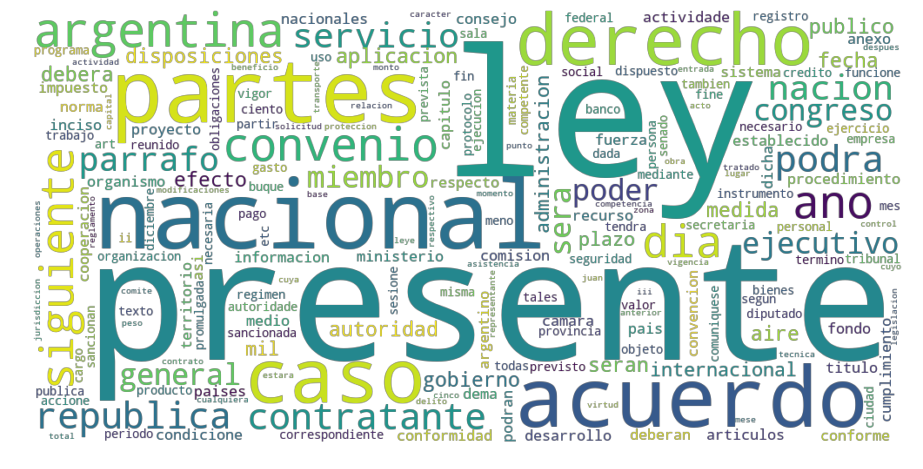

In [66]:
plot_wordCloud(df, quitar, collocations=False)